In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Saving figure some_digit_plot


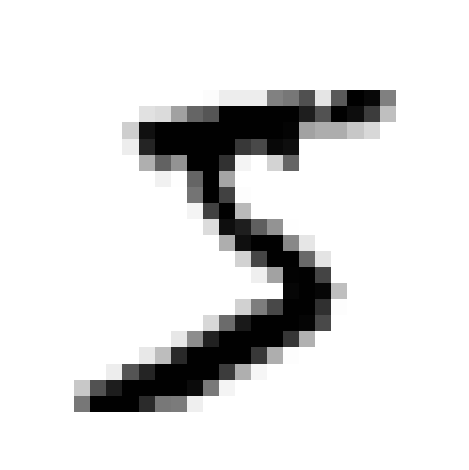

In [4]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")

save_fig("some_digit_plot")
plt.show()

In [5]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [6]:
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # Combine axes 0 and 2 (vertical image grid axis, and vertical image axis),
    # and axes 1 and 3 (horizontal axes). We first need to move the axes that we
    # want to combine next to each other, using transpose(), and only then we
    # can reshape:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

Saving figure more_digits_plot


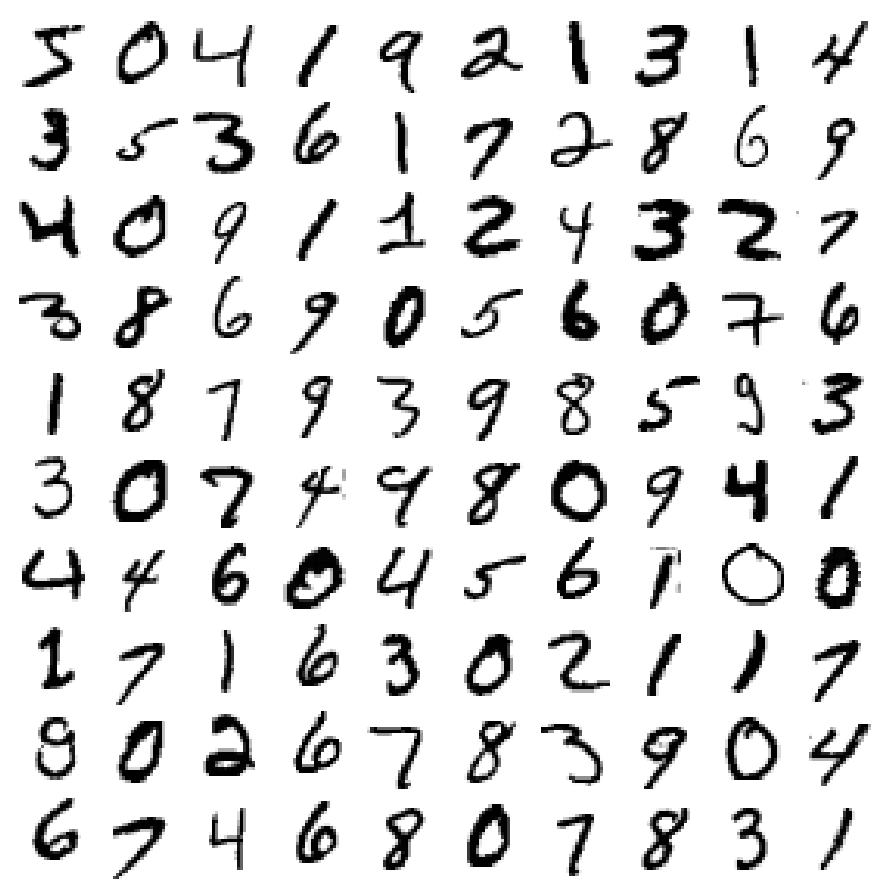

In [7]:
plt.figure(figsize=(9,9))
example_images = X[:100]
plot_digits(example_images, images_per_row=10)
save_fig("more_digits_plot")
plt.show()

In [8]:
y[0]

'5'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.fit_transform(X_test.astype(np.float64))

# Binary Classifier

In [35]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_model = sgd_clf.fit(X_train_scaled, y_train)

In [36]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [37]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
y_pred_sgd = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [38]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, y_pred_sgd))

0.8970333333333333


In [39]:
from sklearn.metrics import confusion_matrix

sgd_cfmx = confusion_matrix(y_train, y_pred_sgd)

In [40]:
sgd_cfmx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

In [44]:
y_sgd_pred_test = sgd_model.predict(X_test_scaled)

In [47]:
print("sgd test set precision score : ", precision_score(y_test,y_sgd_pred_test,average=None))

sgd test set precision score :  [0.96118488 0.98108108 0.93841336 0.92389006 0.93723404 0.90111248
 0.9491342  0.94801223 0.6267507  0.92540541]


In [50]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("sgd test set accuracy : ", accuracy_score(y_test, y_sgd_pred_test))
print("sgd test set precision score : ", precision_score(y_test,y_sgd_pred_test,average=None))
print("sgd test set recall : ", recall_score(y_test,y_sgd_pred_test,average=None))
print("sgd test set f1 score : ", f1_score(y_test,y_sgd_pred_test,average=None))

sgd test set accuracy :  0.8971
sgd test set precision score :  [0.96118488 0.98108108 0.93841336 0.92389006 0.93723404 0.90111248
 0.9491342  0.94801223 0.6267507  0.92540541]
sgd test set recall :  [0.96020408 0.95947137 0.87112403 0.86534653 0.89714868 0.81726457
 0.91544885 0.90466926 0.91889117 0.84836472]
sgd test set f1 score :  [0.96069423 0.9701559  0.90351759 0.89366053 0.91675338 0.85714286
 0.93198725 0.92583375 0.74521232 0.885212  ]


In [51]:
# since sklearn 0.22, you can use sklearn.metrics.plot_confusion_matrix()
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

In [52]:
sgd_cfmx_test = confusion_matrix(y_test, y_sgd_pred_test)

Saving figure sgd_confusion_matrix_test_plot


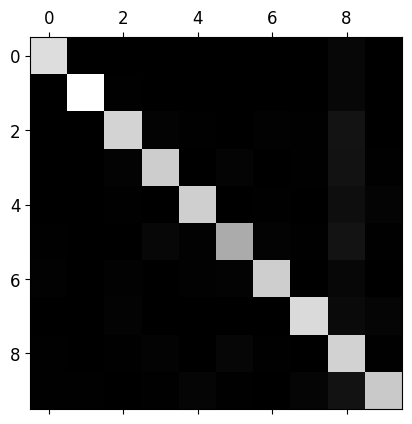

In [53]:
plt.matshow(sgd_cfmx_test, cmap=plt.cm.gray)
save_fig("sgd_confusion_matrix_test_plot", tight_layout=False)
plt.show()

In [55]:
row_sums = sgd_cfmx_test.sum(axis=1, keepdims=True)
norm_conf_mx = sgd_cfmx_test / row_sums

Saving figure sgd_confusion_matrix_test_errors_plot


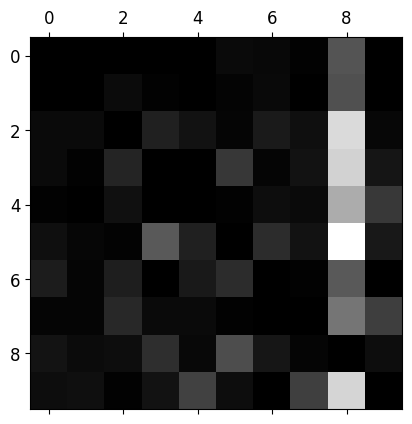

In [56]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("sgd_confusion_matrix_test_errors_plot", tight_layout=False)
plt.show()

# KNN classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [11]:
y_knn_pred = knn_clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

/tmp/ipykernel_46654/3518175631.py:1: DeprecationWarning: Please import `shift` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import shift


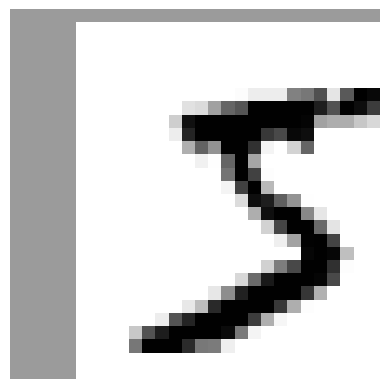

In [13]:
from scipy.ndimage.interpolation import shift
def shift_digit(digit_array, dx, dy, new=0):
    return shift(digit_array.reshape(28, 28), [dy, dx], cval=new).reshape(784)

plot_digit(shift_digit(some_digit, 5, 1, new=100))

In [ ]:
X_train_expanded = [X_train]
y_train_expanded = [y_train]
for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    shifted_images = np.apply_along_axis(shift_digit, axis=1, arr=X_train, dx=dx, dy=dy)
    X_train_expanded.append(shifted_images)
    y_train_expanded.append(y_train)

X_train_expanded = np.concatenate(X_train_expanded)
y_train_expanded = np.concatenate(y_train_expanded)
X_train_expanded.shape, y_train_expanded.shape

In [ ]:
knn_clf.fit(X_train_expanded, y_train_expanded)

In [ ]:
y_knn_expanded_pred = knn_clf.predict(X_test)


In [ ]:
accuracy_score(y_test, y_knn_expanded_pred)

In [ ]:
ambiguous_digit = X_test[2589]
knn_clf.predict_proba([ambiguous_digit])

In [ ]:
plot_digit(ambiguous_digit)

In [58]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5,6]}]

knn_clf = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)

In [60]:
knn_grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.942 total time=  11.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.944 total time=  12.0s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.945 total time=  14.6s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.938 total time=  14.8s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.945 total time=  13.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.942 total time=  14.2s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.946 total time=  14.7s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.945 total time=  14.2s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.941 total time=  14.8s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.947 total time=  15.0s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.939 total time=  14.9s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [61]:
print("knn best params : ",knn_grid_search.best_params_)
print("knn best score",knn_grid_search.best_score_)

knn best params :  {'n_neighbors': 4, 'weights': 'distance'}
knn best score 0.9465166666666667


In [68]:
y_knn_pred_test = knn_grid_search.predict(X_test_scaled)

In [69]:
print("knn test set accuracy : ", accuracy_score(y_test, y_knn_pred_test))
print("knn test set precision score : ", precision_score(y_test,y_knn_pred_test,average=None))
print("knn test set recall : ", recall_score(y_test,y_knn_pred_test,average=None))
print("knn test set f1 score : ", f1_score(y_test,y_knn_pred_test,average=None))

knn test set accuracy :  0.9474
knn test set precision score :  [0.95247525 0.95755518 0.96207585 0.92507205 0.95571576 0.93273543
 0.96173733 0.93542074 0.9628821  0.92807193]
knn test set recall :  [0.98163265 0.9938326  0.93410853 0.95346535 0.94501018 0.93273543
 0.97077244 0.92996109 0.90554415 0.92071358]
knn test set f1 score :  [0.96683417 0.97535668 0.94788594 0.93905412 0.95033282 0.93273543
 0.96623377 0.93268293 0.93333333 0.92437811]


In [65]:
from sklearn.base import clone
knn_grid_search_not_scaled = clone(knn_grid_search)

In [66]:
knn_grid_search_not_scaled.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  42.7s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  41.1s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  38.7s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  37.4s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  35.4s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  33.4s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  35.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  32.9s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  36.9s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  34.2s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  39.6s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [67]:
print("knn not scaled best params : ",knn_grid_search_not_scaled.best_params_)
print("knn not scaled best score",knn_grid_search_not_scaled.best_score_)

knn not scaled best params :  {'n_neighbors': 4, 'weights': 'distance'}
knn not scaled best score 0.9716166666666666


In [70]:
y_knn_pred_test_not_scaled = knn_grid_search_not_scaled.predict(X_test)

In [71]:
print("knn test set accuracy not scaled : ", accuracy_score(y_test, y_knn_pred_test_not_scaled))
print("knn test set precision score not scaled : ", precision_score(y_test,y_knn_pred_test_not_scaled,average=None))
print("knn test set recall not scaled : ", recall_score(y_test,y_knn_pred_test_not_scaled,average=None))
print("knn test set f1 score not scaled : ", f1_score(y_test,y_knn_pred_test_not_scaled,average=None))

knn test set accuracy not scaled :  0.9714
knn test set precision score not scaled :  [0.973      0.96834902 0.98417409 0.96819085 0.97535934 0.96312849
 0.97828335 0.95945946 0.98818475 0.95746785]
knn test set recall not scaled :  [0.99285714 0.99735683 0.96414729 0.96435644 0.96741344 0.96636771
 0.9874739  0.96692607 0.94455852 0.95936571]
knn test set f1 score not scaled :  [0.98282828 0.98263889 0.97405776 0.96626984 0.97137014 0.96474538
 0.98285714 0.96317829 0.96587927 0.95841584]


In [72]:
knn_cfmx_test_not_scaled = confusion_matrix(y_test, y_knn_pred_test_not_scaled)
knn_cfmx_test_not_scaled

array([[ 973,    1,    1,    0,    0,    1,    3,    1,    0,    0],
       [   0, 1132,    2,    0,    0,    0,    1,    0,    0,    0],
       [  10,    5,  995,    2,    1,    0,    0,   16,    3,    0],
       [   0,    1,    3,  974,    1,   14,    1,    7,    4,    5],
       [   1,    5,    0,    0,  950,    0,    4,    3,    0,   19],
       [   4,    0,    0,    9,    2,  862,    7,    1,    3,    4],
       [   4,    2,    0,    0,    3,    3,  946,    0,    0,    0],
       [   0,   17,    4,    0,    3,    0,    0,  994,    0,   10],
       [   5,    2,    4,   14,    5,   11,    4,    4,  920,    5],
       [   3,    4,    2,    7,    9,    4,    1,   10,    1,  968]])

In [73]:
knn_cfmx_test = confusion_matrix(y_test, y_knn_pred_test)
knn_cfmx_test

array([[ 962,    1,    2,    2,    0,    6,    6,    1,    0,    0],
       [   0, 1128,    3,    0,    0,    0,    3,    0,    1,    0],
       [  11,    7,  964,   16,    3,    0,    7,   13,    9,    2],
       [   0,    3,    3,  963,    2,   14,    0,   11,   10,    4],
       [   1,    7,    5,    2,  928,    2,    6,    4,    3,   24],
       [   4,    0,    1,   23,    4,  832,   12,    2,    5,    9],
       [  12,    4,    1,    0,    2,    8,  930,    0,    1,    0],
       [   0,   21,   11,    4,    5,    2,    0,  956,    1,   28],
       [  14,    2,    8,   20,   10,   23,    3,    7,  882,    5],
       [   6,    5,    4,   11,   17,    5,    0,   28,    4,  929]])

Saving figure knn_confusion_matrix_test_scaled_plot


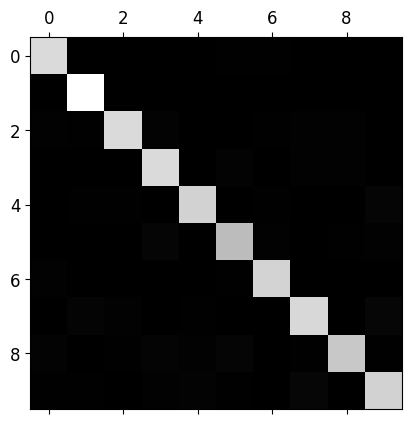

In [74]:
plt.matshow(knn_cfmx_test, cmap=plt.cm.gray)
save_fig("knn_confusion_matrix_test_scaled_plot", tight_layout=False)
plt.show()

In [75]:
row_sums = knn_cfmx_test.sum(axis=1, keepdims=True)
norm_conf_mx = knn_cfmx_test / row_sums

Saving figure knn_confusion_matrix_test_scaled_errors_plot


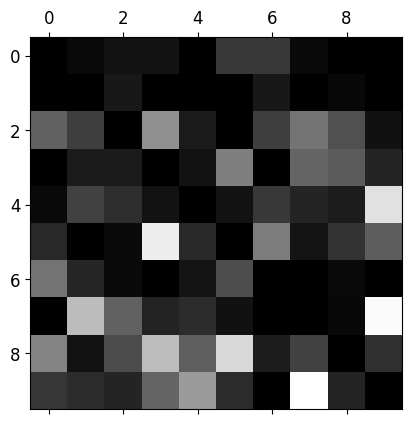

In [76]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("knn_confusion_matrix_test_scaled_errors_plot", tight_layout=False)
plt.show()

Saving figure knn_confusion_matrix_test_not_scaled_plot


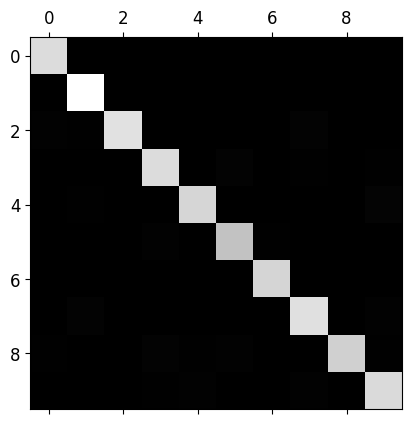

In [77]:
plt.matshow(knn_cfmx_test_not_scaled, cmap=plt.cm.gray)
save_fig("knn_confusion_matrix_test_not_scaled_plot", tight_layout=False)
plt.show()

In [78]:
row_sums = knn_cfmx_test_not_scaled.sum(axis=1, keepdims=True)
norm_conf_mx = knn_cfmx_test_not_scaled / row_sums

Saving figure knn_confusion_matrix_test_not_scaled_errors_plot


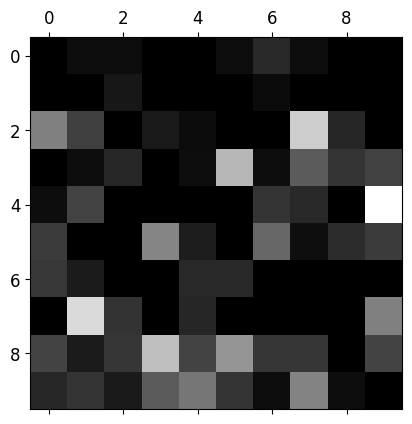

In [79]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("knn_confusion_matrix_test_not_scaled_errors_plot", tight_layout=False)
plt.show()

In [81]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    # Not shown
    plt.grid(True)   

In [84]:
#fpr_sgd, tpr_sgd, sgd_thresholds = roc_curve(y_train, y_sgd_pred_test)
fpr_knn, tpr_knn, knn_thresholds = roc_curve(y_train, y_knn_pred_test_not_scaled)

ValueError: multiclass format is not supported

In [ ]:
plt.figure(figsize=(8, 6))                                    # Not shown
plot_roc_curve(fpr, tpr)
fpr_90 = fpr[np.argmax(tpr >= recall_90_precision)]           # Not shown
plt.plot([fpr_90, fpr_90], [0., recall_90_precision], "r:")   # Not shown
plt.plot([0.0, fpr_90], [recall_90_precision, recall_90_precision], "r:")  # Not shown
plt.plot([fpr_90], [recall_90_precision], "ro")               # Not shown
save_fig("roc_curve_plot")                                    # Not shown
plt.show()

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
y_train_forest = cross_val_predict(forest_clf, X_train_scaled, y_train, cv=3)

In [ ]:
accuracy_score(y_train,y_train_forest)

In [ ]:
forest_model = forest_clf.fit(X_train_scaled,y_train)
y_pred_forest = forest_model.predict(X_test_scaled)

In [ ]:
print("rf test set accuracy : ", accuracy_score(y_test, y_knn_pred_test))
print("rf test set precision score : ", precision_score(y_test,y_knn_pred_test,average=None))
print("rf test set recall : ", recall_score(y_test,y_knn_pred_test,average=None))
print("rf test set f1 score : ", f1_score(y_test,y_knn_pred_test,average=None))

In [ ]:
forest_cfmx_test = forest_clf.fit(y_test,y_pred_forest)
forest_cfmx_test

In [ ]:
row_sums = forest_cfmx_test.sum(axis=1, keepdims=True)
norm_conf_mx = forest_cfmx_test / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("forest_confusion_matrix_test_errors_plot", tight_layout=False)
plt.show()

# Lab 5

# SVM Classifier

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [14]:
from sklearn.svm import SVC

In [15]:
svm_clf = SVC(gamma="auto", random_state=42)

In [13]:
#y_train_svm = cross_val_predict(svm_clf, X_train_scaled, y_train, cv=3)

NameError: name 'cross_val_predict' is not defined

In [ ]:
accuracy_score(y_train,y_train_svm)

In [ ]:
svm_model = svm_clf.fit(X_train_scaled,y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
print("rf test set accuracy : ", accuracy_score(y_test, y_knn_pred_test))
print("rf test set precision score : ", precision_score(y_test,y_knn_pred_test,average=None))
print("rf test set recall : ", recall_score(y_test,y_knn_pred_test,average=None))
print("rf test set f1 score : ", f1_score(y_test,y_knn_pred_test,average=None))

In [ ]:
svm_cfmx_test = svm_clf.fit(y_test,y_pred_svm)
svm_cfmx_test

In [ ]:
row_sums = svm_cfmx_test.sum(axis=1, keepdims=True)
norm_conf_mx = knn_cfmx_test / row_sums

In [ ]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
save_fig("svm_confusion_matrix_test_errors_plot", tight_layout=False)
plt.show()

# SVC Classifier

## RandomizedSearch

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
import joblib

#### Polynomial kernel

In [13]:
from scipy.stats import expon, reciprocal, uniform, randint

#gamma is ignored when kernel is linear
param_distribs_svc = {
        'C': uniform(0.01,100000),
        'degree': randint(2,6),
        'coef0': uniform(0.1, 5)  
    }

svc_poly = SVC(kernel='poly')
rd_s_svc_poly = RandomizedSearchCV(svc_poly, param_distributions=param_distribs_svc,
                                n_iter=10, cv=3,
                                verbose=3, random_state=42)
rd_s_svc_poly.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV 1/3] END C=37454.02188473625, coef0=4.85357153204958, degree=4;, score=0.967 total time= 3.2min
[CV 2/3] END C=37454.02188473625, coef0=4.85357153204958, degree=4;, score=0.965 total time= 3.3min
[CV 3/3] END C=37454.02188473625, coef0=4.85357153204958, degree=4;, score=0.964 total time= 3.4min
[CV 1/3] END C=77969.11002727693, coef0=3.084250789732435, degree=3;, score=0.967 total time= 3.1min
[CV 2/3] END C=77969.11002727693, coef0=3.084250789732435, degree=3;, score=0.966 total time= 2.9min
[CV 3/3] END C=77969.11002727693, coef0=3.084250789732435, degree=3;, score=0.965 total time= 2.9min
[CV 1/3] END C=15599.462033620264, coef0=0.3904180608409973, degree=5;, score=0.977 total time= 5.1min
[CV 2/3] END C=15599.462033620264, coef0=0.3904180608409973, degree=5;, score=0.975 total time= 5.1min
[CV 3/3] END C=15599.462033620264, coef0=0.3904180608409973, degree=5;, score=0.976 total time= 4.2min
[CV 1/3] END C=33370.871113

RandomizedSearchCV(cv=3, estimator=SVC(kernel='poly'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f7014552fd0>,
                                        'coef0': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f701452a050>,
                                        'degree': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f7014553910>},
                   random_state=42, verbose=3)

In [14]:
model_filename = "models/svc_poly_rd_model.pkl"

joblib.dump(rd_s_svc_poly.best_estimator_, model_filename)


['models/svc_poly_rd_model.pkl']

In [29]:
rd_s_svc_poly_best = joblib.load("models/svc_poly_rd_model.pkl")

In [30]:
rd_s_svc_poly_best

SVC(C=706.6405219717406, coef0=0.2153121252070788, degree=4, kernel='poly')

In [17]:
y_pred_svc_poly_rd = rd_s_svc_poly_best.predict(X_test_scaled)

In [21]:
print("svc poly test set accuracy : ", accuracy_score(y_test, y_pred_svc_poly_rd))
print("svc poly test set precision score : ", precision_score(y_test,y_pred_svc_poly_rd,average=None))
print("svc poly test set recall : ", recall_score(y_test,y_pred_svc_poly_rd,average=None))
print("svc poly test set f1 score : ", f1_score(y_test,y_pred_svc_poly_rd,average=None))

svc poly test set accuracy :  0.9795
svc poly test set precision score :  [0.98580122 0.99121265 0.97398844 0.97931034 0.97474747 0.97418631
 0.98426023 0.98417409 0.97239264 0.973     ]
svc poly test set recall :  [0.99183673 0.9938326  0.97965116 0.98415842 0.98268839 0.97309417
 0.97912317 0.96789883 0.97638604 0.96432111]
svc poly test set f1 score :  [0.98880977 0.9925209  0.97681159 0.9817284  0.97870183 0.97363993
 0.98168498 0.97596861 0.97438525 0.96864111]


#### RBF kernel

In [13]:
from scipy.stats import expon, reciprocal, uniform, randint

In [13]:
#gamma is ignored when kernel is linear
param_distribs_svc = {
        'C': uniform(0.01,100000),
        'gamma': expon(scale=1.0)
    }

svc_rbf = SVC(kernel='rbf')
rd_s_svc_rbf = RandomizedSearchCV(svc_rbf, param_distributions=param_distribs_svc,
                                n_iter=5, cv=2,
                                verbose=3, random_state=42)
rd_s_svc_rbf.fit(X_train_scaled, y_train)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV 1/2] END C=37454.02188473625, gamma=3.010121430917521;, score=0.112 total time=24.9min
[CV 2/2] END C=37454.02188473625, gamma=3.010121430917521;, score=0.112 total time=21.3min
[CV 1/2] END C=73199.4041811405, gamma=0.9129425537759532;, score=0.112 total time=22.1min
[CV 2/2] END C=73199.4041811405, gamma=0.9129425537759532;, score=0.112 total time=22.1min
[CV 1/2] END C=15601.874044243652, gamma=0.16959629191460518;, score=0.165 total time=21.3min
[CV 2/2] END C=15601.874044243652, gamma=0.16959629191460518;, score=0.177 total time=21.3min
[CV 1/2] END C=5808.371216819946, gamma=2.0112308644799395;, score=0.112 total time=21.6min
[CV 2/2] END C=5808.371216819946, gamma=2.0112308644799395;, score=0.112 total time=21.5min
[CV 1/2] END C=60111.51117432088, gamma=1.2312500617045903;, score=0.112 total time=21.9min
[CV 2/2] END C=60111.51117432088, gamma=1.2312500617045903;, score=0.112 total time=21.9min


RandomizedSearchCV(cv=2, estimator=SVC(), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb7d724a950>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fb82bbd54d0>},
                   random_state=42, verbose=3)

In [14]:
model_filename = "models/svc_rbf_rd_model.pkl"

joblib.dump(rd_s_svc_rbf.best_estimator_, model_filename)

['models/svc_rbf_rd_model.pkl']

In [15]:
rd_s_svc_rbf_best = joblib.load("models/svc_rbf_rd_model.pkl")

In [16]:
y_pred_svc_rbf_rd = rd_s_svc_rbf_best.predict(X_test_scaled)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [ ]:
print("svc rbf test set accuracy : ", accuracy_score(y_test, y_pred_svc_rbf_rd))
print("svc rbf test set precision score : ", precision_score(y_test,y_pred_svc_rbf_rd,average=None))
print("svc rbf test set recall : ", recall_score(y_test,y_pred_svc_rbf_rd,average=None))
print("svc rbf test set f1 score : ", f1_score(y_test,y_pred_svc_rbf_rd,average=None))

svc rbf test set accuracy :  0.1719
svc rbf test set precision score :  [0.         1.         0.         0.         0.         0.
 0.         0.11043077 0.         0.        ]
svc rbf test set recall :  [0.         0.60881057 0.         0.         0.         0.
 0.         1.         0.         0.        ]
svc rbf test set f1 score :  [0.         0.75684556 0.         0.         0.         0.
 0.         0.19889717 0.         0.        ]


/home/paulc/Documents/Efrei/computerVision/conference-tried/lib64/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### Linear kernel

In [16]:
#gamma is ignored when kernel is linear
param_distribs_svc = {
        'C': uniform(0.01,100),
    }

svc_lin = SVC(kernel='linear')
rd_s_svc_lin = RandomizedSearchCV(svc_lin, param_distributions=param_distribs_svc,
                                n_iter=5, cv=3,
                                verbose=3, random_state=42)
rd_s_svc_lin.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ..............C=37.464011884736244;, score=0.909 total time=25.4min
[CV 2/3] END ..............C=37.464011884736244;, score=0.911 total time=22.8min
[CV 3/3] END ..............C=37.464011884736244;, score=0.909 total time=16.5min
[CV 1/3] END ...............C=95.08143064099163;, score=0.908 total time=66.3min
[CV 2/3] END ...............C=95.08143064099163;, score=0.911 total time=67.1min
[CV 3/3] END ...............C=95.08143064099163;, score=0.910 total time=34.4min
[CV 1/3] END ...............C=73.20939418114051;, score=0.909 total time=41.0min
[CV 2/3] END ...............C=73.20939418114051;, score=0.911 total time=41.5min
[CV 3/3] END ...............C=73.20939418114051;, score=0.910 total time=34.8min
[CV 1/3] END ...............C=59.87584841970366;, score=0.909 total time=31.7min
[CV 2/3] END ...............C=59.87584841970366;, score=0.911 total time=37.9min
[CV 3/3] END ...............C=59.87584841970366;,

RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear'), n_iter=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fbc198075d0>},
                   random_state=42, verbose=3)

In [17]:
model_filename = "models/svc_lin_rd_model.pkl"

joblib.dump(rd_s_svc_lin.best_estimator_, model_filename)

['models/svc_lin_rd_model.pkl']

In [18]:
rd_s_svc_lin_best = joblib.load("models/svc_lin_rd_model.pkl")

In [19]:
y_pred_svc_lin_rd = rd_s_svc_lin_best.predict(X_test_scaled)

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [21]:
print("svc lin test set accuracy : ", accuracy_score(y_test, y_pred_svc_lin_rd))
print("svc lin test set precision score : ", precision_score(y_test,y_pred_svc_lin_rd,average=None))
print("svc lin test set recall : ", recall_score(y_test,y_pred_svc_lin_rd,average=None))
print("svc lin test set f1 score : ", f1_score(y_test,y_pred_svc_lin_rd,average=None))

svc lin test set accuracy :  0.9251
svc lin test set precision score :  [0.93713163 0.9556314  0.89934149 0.88941399 0.91428571 0.89702517
 0.95747001 0.94705295 0.91523605 0.93578947]
svc lin test set recall :  [0.97346939 0.98678414 0.92635659 0.93168317 0.94501018 0.87892377
 0.91649269 0.92217899 0.87577002 0.88107037]
svc lin test set f1 score :  [0.95495495 0.97095795 0.91264916 0.91005803 0.92939409 0.88788222
 0.93653333 0.93445047 0.89506821 0.90760592]


## GridSearch

#### Poly kernel

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid_svc = {
    'C': [0.1,1,10],
    'degree': [2,3,5],
    'coef0': [0.1,1,5]
}

svc_poly = SVC(kernel='poly')

grid_search_svc_poly = GridSearchCV(svc_poly, param_grid=param_grid_svc,
                           cv=3, scoring='accuracy',
                           verbose=3)

grid_search_svc_poly.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres :", grid_search_svc_poly.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END .......C=0.1, coef0=0.1, degree=2;, score=-0.906 total time= 8.0min
[CV 2/3] END .......C=0.1, coef0=0.1, degree=2;, score=-0.993 total time= 7.8min
[CV 3/3] END .......C=0.1, coef0=0.1, degree=2;, score=-0.946 total time= 7.9min
[CV 1/3] END .......C=0.1, coef0=0.1, degree=3;, score=-1.394 total time=12.0min
[CV 2/3] END .......C=0.1, coef0=0.1, degree=3;, score=-1.382 total time=12.0min
[CV 3/3] END .......C=0.1, coef0=0.1, degree=3;, score=-1.456 total time=12.2min
[CV 1/3] END .......C=0.1, coef0=0.1, degree=5;, score=-9.160 total time=20.9min
[CV 2/3] END .......C=0.1, coef0=0.1, degree=5;, score=-9.586 total time=20.8min
[CV 3/3] END ......C=0.1, coef0=0.1, degree=5;, score=-10.110 total time=21.0min
[CV 1/3] END .........C=0.1, coef0=1, degree=2;, score=-0.878 total time= 4.4min
[CV 2/3] END .........C=0.1, coef0=1, degree=2;, score=-0.885 total time= 4.4min
[CV 3/3] END .........C=0.1, coef0=1, degree=2;,

In [23]:
model_filename = "models/svc_poly_grd_model.pkl"

joblib.dump(grid_search_svc_poly.best_estimator_, model_filename)

['models/svc_poly_grd_model.pkl']

In [24]:
grid_search_svc_poly_best = joblib.load("models/svc_poly_grd_model.pkl")

In [25]:
y_pred_svc_poly_grd = grid_search_svc_poly_best.predict(X_test_scaled)

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict

In [35]:
print("GridSearch")
print("svc poly test set accuracy : ", accuracy_score(y_test, y_pred_svc_poly_grd))
print("svc poly test set precision score : ", precision_score(y_test,y_pred_svc_poly_grd,average=None))
print("svc poly test set recall : ", recall_score(y_test,y_pred_svc_poly_grd,average=None))
print("svc poly test set f1 score : ", f1_score(y_test,y_pred_svc_poly_grd,average=None))

GridSearch
svc poly test set accuracy :  0.9804
svc poly test set precision score :  [0.98678862 0.98861646 0.97685632 0.98029557 0.97376387 0.97536394
 0.98426023 0.9851925  0.97540984 0.97590361]
svc poly test set recall :  [0.99081633 0.99471366 0.98158915 0.98514851 0.98268839 0.9764574
 0.97912317 0.97081712 0.97741273 0.96333003]
svc poly test set f1 score :  [0.98879837 0.99165569 0.97921701 0.98271605 0.97820578 0.97591036
 0.98168498 0.97795198 0.97641026 0.96957606]


#### RBF kernel

In [14]:
from sklearn.model_selection import GridSearchCV
param_grid_svc = {
    'C': [0.1,0.1,1,10,100,1000],
    'gamma': ['scale','auto']
}

svc_poly = SVC(kernel='rbf')

grid_search_svc_rbf = GridSearchCV(svc_poly, param_grid=param_grid_svc,
                           cv=3, scoring='accuracy',
                           verbose=3)

grid_search_svc_rbf.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres :", grid_search_svc_rbf.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV 1/3] END ...............C=0.1, gamma=scale;, score=-1.316 total time=11.7min
[CV 2/3] END ...............C=0.1, gamma=scale;, score=-1.215 total time=10.4min
[CV 3/3] END ...............C=0.1, gamma=scale;, score=-1.268 total time=11.7min
[CV 1/3] END ................C=0.1, gamma=auto;, score=-1.271 total time= 8.3min
[CV 2/3] END ................C=0.1, gamma=auto;, score=-1.210 total time= 8.3min
[CV 3/3] END ................C=0.1, gamma=auto;, score=-1.262 total time= 9.1min
[CV 1/3] END ...............C=0.1, gamma=scale;, score=-1.316 total time=11.3min
[CV 2/3] END ...............C=0.1, gamma=scale;, score=-1.215 total time= 8.3min
[CV 3/3] END ...............C=0.1, gamma=scale;, score=-1.268 total time= 8.7min
[CV 1/3] END ................C=0.1, gamma=auto;, score=-1.271 total time= 8.3min
[CV 2/3] END ................C=0.1, gamma=auto;, score=-1.210 total time= 8.4min
[CV 3/3] END ................C=0.1, gamma=auto;,

In [15]:
model_filename = "models/svc_rbf_grd_model.pkl"

joblib.dump(grid_search_svc_rbf.best_estimator_, model_filename)

['models/svc_rbf_grd_model.pkl']

In [32]:
grid_search_svc_rbf_best = joblib.load("models/svc_rbf_grd_model.pkl")

In [33]:
y_pred_svc_rbf_grd = grid_search_svc_rbf_best.predict(X_test_scaled)

In [34]:
print("GridSearch")
print("svc rbf test set accuracy : ", accuracy_score(y_test, y_pred_svc_rbf_grd))
print("svc rbf test set precision score : ", precision_score(y_test,y_pred_svc_rbf_grd,average=None))
print("svc rbf test set recall : ", recall_score(y_test,y_pred_svc_rbf_grd,average=None))
print("svc rbf test set f1 score : ", f1_score(y_test,y_pred_svc_rbf_grd,average=None))

GridSearch
svc rbf test set accuracy :  0.9716
svc rbf test set precision score :  [0.982706   0.98515284 0.96157541 0.97238659 0.97435897 0.96308725
 0.98521647 0.94328922 0.97393118 0.9745935 ]
svc rbf test set recall :  [0.98571429 0.9938326  0.96996124 0.97623762 0.96741344 0.96524664
 0.97390397 0.97081712 0.95893224 0.95044599]
svc rbf test set f1 score :  [0.98420785 0.98947368 0.96575012 0.9743083  0.97087379 0.96416573
 0.97952756 0.95685523 0.96637351 0.96236829]


#### Linear kernel

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid_svc = {
    'C': [0.01,0.1,1,10,100],
}

svc_poly = SVC(kernel='linear')

grid_search_svc_lin = GridSearchCV(svc_poly, param_grid=param_grid_svc,
                           cv=3, scoring='accuracy',
                           verbose=3)

grid_search_svc_lin.fit(X_train_scaled, y_train)

print("Meilleurs hyperparamètres :", grid_search_svc_lin.best_params_)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV 1/3] END ...........................C=0.01;, score=-1.021 total time= 3.5min
[CV 2/3] END ...........................C=0.01;, score=-1.010 total time= 3.2min
[CV 3/3] END ...........................C=0.01;, score=-1.001 total time= 3.3min
[CV 1/3] END ............................C=0.1;, score=-1.168 total time= 3.3min
[CV 2/3] END ............................C=0.1;, score=-1.137 total time= 3.1min
[CV 3/3] END ............................C=0.1;, score=-1.198 total time= 3.1min
[CV 1/3] END ..............................C=1;, score=-1.448 total time= 2.8min
[CV 2/3] END ..............................C=1;, score=-1.291 total time= 2.8min
[CV 3/3] END ..............................C=1;, score=-1.396 total time= 2.7min
[CV 1/3] END .............................C=10;, score=-1.511 total time= 7.6min
[CV 2/3] END .............................C=10;, score=-1.387 total time= 7.4min
[CV 3/3] END .............................C=10;, 

In [14]:
model_filename = "models/svc_lin_grd_model.pkl"

joblib.dump(grid_search_svc_lin.best_estimator_, model_filename)

['models/svc_lin_grd_model.pkl']

In [15]:
grid_search_svc_lin_best = joblib.load("models/svc_lin_grd_model.pkl")

In [16]:
y_pred_svc_lin_grd = grid_search_svc_lin_best.predict(X_test_scaled)

In [20]:
print("GridSearch")
print("svc lin test set accuracy : ", accuracy_score(y_test, y_pred_svc_lin_grd))
print("svc lin test set precision score : ", precision_score(y_test,y_pred_svc_lin_grd,average=None))
print("svc lin test set recall : ", recall_score(y_test,y_pred_svc_lin_grd,average=None))
print("svc lin test set f1 score : ", f1_score(y_test,y_pred_svc_lin_grd,average=None))

GridSearch
svc lin test set accuracy :  0.9453
svc lin test set precision score :  [0.9593254  0.97395833 0.93474088 0.91738713 0.94       0.92
 0.96613757 0.95531281 0.93361433 0.94699286]
svc lin test set recall :  [0.98673469 0.98854626 0.94379845 0.94554455 0.95723014 0.90246637
 0.95302714 0.93579767 0.90965092 0.92071358]
svc lin test set f1 score :  [0.97283702 0.98119808 0.93924783 0.93125305 0.94853683 0.91114884
 0.95953757 0.94545455 0.92147686 0.93366834]
